<h1>Fine-tuning DistilBERT into a chatbot<h1>

Using the Kaggle dataset:https://www.kaggle.com/datasets/grafstor/simple-dialogs-for-chatbot and the ChatGPT-generated dataset.

Example conversation with the chatbot fine-tuned with the ChatGPT dataset:
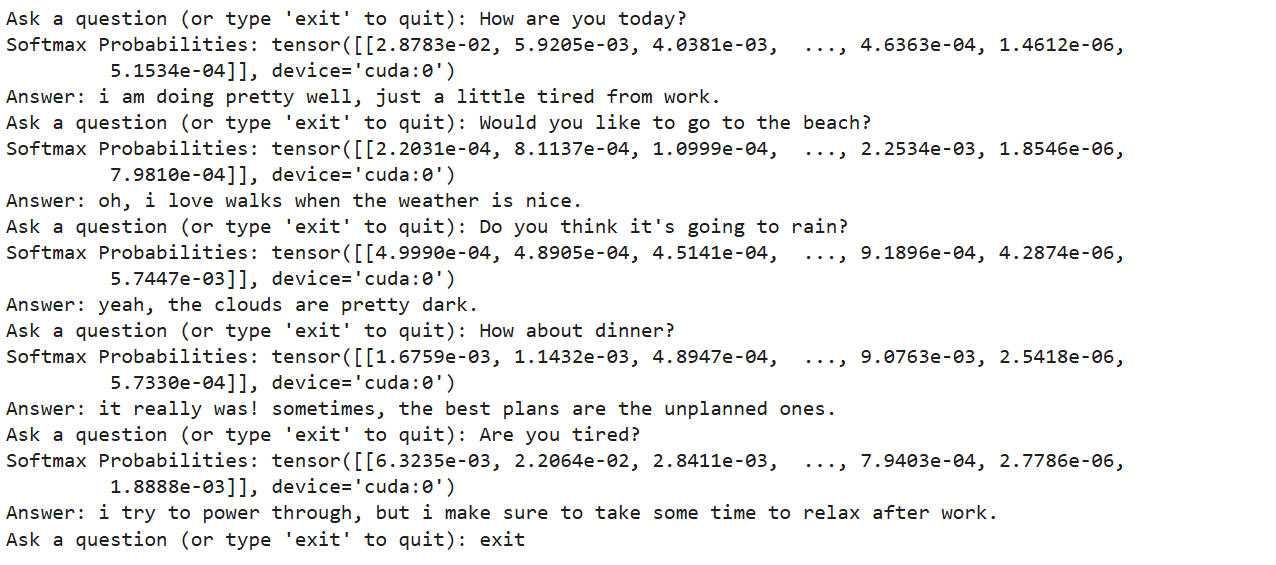

Example conversation with the chatbot fine-tuned with the Kaggle dataset:
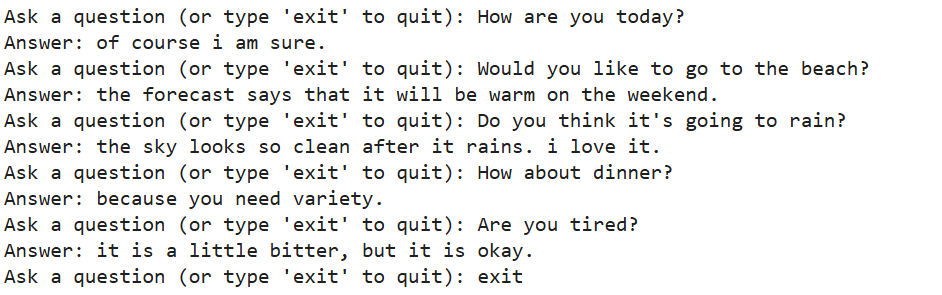

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_list = []
my_file_path_kaggle = "my_file_path_to_dataset" # path to the Kaggle dataset, dataset.txt
with open(my_file_path_kaggle, "r") as f:
  data_list = [line.strip("\n") for line in f]

print(f"Loaded {len(data_list)} entries\n")
for i in range(5):
  print(data_list[i])

Loaded 3725 entries

hi, how are you doing?	i'm fine. how about yourself?
i'm fine. how about yourself?	i'm pretty good. thanks for asking.
i'm pretty good. thanks for asking.	no problem. so how have you been?
no problem. so how have you been?	i've been great. what about you?
i've been great. what about you?	i've been good. i'm in school right now.


In [ ]:
# making the data cleaner
def uniform_data(data):
  limit = 100

  for i in range(len(data)):
    line = data[i]
    line = line.replace("'ve", " have")
    line = line.replace("'m", " am")
    line = line.replace("'re", " are")
    line = line.replace("'ll", " will")
    line = line.replace("can't", "cannot")
    line = line.replace("n't", " not")
    line = line.replace("i'd", "i would")
    line = line.replace("he's", "he is")
    line = line.replace("it's", "it is")
    line = line.replace("here's", "here is")
    line = line.replace("how's", "how is")
    line = line.replace("who's", "who is")
    line = line.replace("hat's", "hat is")
    line = line.replace("why's", "why is")
    line = line.replace("when's", "when is")
    line = line.replace("everything's", "everything has")
    line = line.replace("something's", "something is")
    line = line.replace("nothing's", "nothing is")
    line = line.replace("someone's", "someone is")
    line = line.replace("'d have", " would have")
    line = line.replace("'d better", " would better")
    line = line.replace("gonna", "going to")
    #line = line.replace("?","") #not sure about the punctuation marks yet
    data[i] = line

    # if len(line.split("\t"))<2 and limit>0:
    #   print(f"{i}. {line}")
    #   limit -= 1
    # for testing - finding parts that are not yet included above
    #exclusions = ["let's","macy's","o'clock"]
    #if (("'" in line) and [(ex in line) for ex in exclusions].count(True) < 1 and limit >= 0):
    #  print(line)
    #  limit -= 1

  return data

In [ ]:
data_list = uniform_data(data_list)

In [ ]:
print(data_list)

['hi, how are you doing?\ti am fine. how about yourself?', 'i am fine. how about yourself?\ti am pretty good. thanks for asking.', 'i am pretty good. thanks for asking.\tno problem. so how have you been?', 'no problem. so how have you been?\ti have been great. what about you?', 'i have been great. what about you?\ti have been good. i am in school right now.', 'i have been good. i am in school right now.\twhat school do you go to?', 'what school do you go to?\ti go to pcc.', 'i go to pcc.\tdo you like it there?', 'do you like it there?\tit is okay. it is a really big campus.', 'it is okay. it is a really big campus.\tgood luck with school.', 'good luck with school.\tthank you very much.', 'how is it going?\ti am doing well. how about you?', 'i am doing well. how about you?\tnever better, thanks.', 'never better, thanks.\tso how have you been lately?', 'so how have you been lately?\ti have actually been pretty good. you?', 'i have actually been pretty good. you?\ti am actually in school 

In [ ]:
def split_data(data):
  prompts, replies = [], []

  for line in data:
    split = line.split("\t")
    if (len(split)<2): # if line doesn't have two columns, report it
      print(line)
    else:
      prompts.append(split[0].strip())
      replies.append(split[1].strip())

  return prompts, replies

In [ ]:
import pandas as pd

prompts, replies = split_data(data_list)

data = pd.DataFrame({"prompt" : prompts ,"answer": replies})
data.head()

,prompt,answer
0,"hi, how are you doing?",i am fine. how about yourself?
1,i am fine. how about yourself?,i am pretty good. thanks for asking.
2,i am pretty good. thanks for asking.,no problem. so how have you been?
3,no problem. so how have you been?,i have been great. what about you?
4,i have been great. what about you?,i have been good. i am in school right now.


In [ ]:
# data preparation from generated dataset
import pandas as pd

data_list2 = []
my_file_path_chatgpt = "my_file_path_to_dataset" # path to the chatGPT-generated dataset, generated_dataset_clean.txt
with open(my_file_path_chatgpt, "r") as f:
  data_list2 = [line.strip("\n") for line in f]

print(f"Loaded {len(data_list2)} entries\n")
for i in range(5):
  print(data_list2[i])
print()

data_list2 = uniform_data(data_list2)

prompts2, replies2 = split_data(data_list2)

gen_data = pd.DataFrame({"prompt": prompts2 ,"answer": replies2})
print(gen_data.shape)
gen_data.head()

Loaded 1611 entries

how have you been feeling lately?	i'm doing pretty well, just a little tired from work.
are you getting enough sleep these days?	not really, but i'm trying to go to bed earlier.
you seem really energized today!	thanks, i started doing morning yoga, and it's helping a lot.
have you been drinking enough water?	probably not, i always forget to refill my bottle.
you've been working so hard lately. are you taking breaks?	i try to, but sometimes it's hard to step away.

(1611, 2)


,prompt,answer
0,how have you been feeling lately?,"i am doing pretty well, just a little tired fr..."
1,are you getting enough sleep these days?,"not really, but i am trying to go to bed earlier."
2,you seem really energized today!,"thanks, i started doing morning yoga, and it i..."
3,have you been drinking enough water?,"probably not, i always forget to refill my bot..."
4,you have been working so hard lately. are you ...,"i try to, but sometimes it is hard to step away."


In [ ]:
#import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.utils import resample

#df_initial = data # replace the bottom line with this one for the Kaggle dataset
df_initial = gen_data

# Uncomment for Kaggle dataset; the chatGPT data is balanced enough that there is no need for this
# Create a balanced dataset (so that the model would not just answer "what do you mean?" to every prompt)
#max_samples = df_initial['answer'].value_counts().min()  # Use the minimum class size
#balanced_df = pd.concat([
#    resample(df_initial[df_initial['answer'] == ans], replace=True, n_samples=max_samples, random_state=42)
#    for ans in df_initial['answer'].unique()
#])

# Inspect dataset imbalance
print(df_initial['answer'].value_counts())
#print(balanced_df['answer'].value_counts()) # uncomment for Kaggle dataset

df = df_initial
#df = balanced_df #replace the above line with this one for the Kaggle dataset

# Ensure the dataset has the required columns
assert 'prompt' in df.columns and 'answer' in df.columns, "Dataset must have 'prompt' and 'answer' columns."

# Map answers to unique integer labels
unique_answers = df['answer'].unique()
answer_to_label = {ans: idx for idx, ans in enumerate(unique_answers)}
label_to_answer = {idx: ans for ans, idx in answer_to_label.items()}

df['label'] = df['answer'].map(answer_to_label)

# Train-test split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['prompt'].tolist(), df['label'].tolist(), test_size=0.2, random_state=42
)

# Step 2: Tokenization and dataset preparation
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

class PromptAnswerDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoded = self.tokenizer(
            text,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoded['input_ids'].squeeze(0),
            'attention_mask': encoded['attention_mask'].squeeze(0),
            'label': torch.tensor(label, dtype=torch.long)
        }

# Create DataLoader objects
train_dataset = PromptAnswerDataset(train_texts, train_labels, tokenizer)
val_dataset = PromptAnswerDataset(val_texts, val_labels, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

# Step 3: Model setup
model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased', num_labels=len(unique_answers)
)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

optimizer = AdamW(model.parameters(), lr=5e-5, weight_decay=0.01)
criterion = torch.nn.CrossEntropyLoss()

# Step 4: Training loop
def train(model, dataloader, optimizer, criterion):
    model.train()
    total_loss = 0
    for batch in dataloader:
        optimizer.zero_grad()

        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    return total_loss / len(dataloader)

# Validation loop
def evaluate(model, dataloader):
    model.eval()
    total_loss = 0
    preds, true_labels = [], []

    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits

            total_loss += loss.item()
            preds.extend(torch.argmax(logits, dim=1).cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    print(f"Sample Predictions: {preds[:10]}")
    print(f"True Labels: {true_labels[:10]}")

    accuracy = accuracy_score(true_labels, preds)
    f1 = f1_score(true_labels, preds, average='weighted')
    return total_loss / len(dataloader), accuracy, f1

# Training process
num_epochs = 10
for epoch in range(num_epochs):
    train_loss = train(model, train_loader, optimizer, criterion)
    val_loss, val_accuracy, val_f1 = evaluate(model, val_loader)

    print(f"Epoch {epoch + 1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}, Val F1 Score: {val_f1:.4f}")

# Step 5: Save the fine-tuned model
my_path_gpt = "my_folder_path/fine_tuned_distilbert_chatgpt"
#my_path_kaggle = "my_folder_path/fine_tuned_distilbert_kaggle"
model.save_pretrained(my_path_gpt)
tokenizer.save_pretrained(my_path_gpt)
#model.save_pretrained(my_path_kaggle) # replace the above lines with these for saving the Kaggle dataset model
#tokenizer.save_pretrained(my_path_kaggle)

# Step 6: Inference function
def chatbot_response(prompt):
    model.eval()
    encoded = tokenizer(
        prompt,
        max_length=128,
        padding='max_length',
        truncation=True,
        return_tensors='pt'
    )

    input_ids = encoded['input_ids'].to(device)
    attention_mask = encoded['attention_mask'].to(device)

    with torch.no_grad():
        logits = model(input_ids, attention_mask=attention_mask).logits
        probs = torch.nn.functional.softmax(logits, dim=1)
        #print(f"Softmax Probabilities: {probs}")

        predicted_label = torch.argmax(logits, dim=1).item()

    return label_to_answer[predicted_label]

# Test the chatbot
print(chatbot_response("Your test prompt here"))


SyntaxError: '(' was never closed (<ipython-input-13-8f038b6f7032>, line 145)

In [ ]:
# Test the chatbot
print(chatbot_response("What do you like to eat for breakfast?"))

no, i hate vegetables.


In [ ]:
# Interactive Q&A
while True:
    user_question = input("Ask a question (or type 'exit' to quit): ")
    if user_question.lower() == 'exit':
        break
    answer = chatbot_response(user_question)
    print(f"Answer: {answer}")

Ask a question (or type 'exit' to quit): How are you today?
Answer: of course i am sure.
Ask a question (or type 'exit' to quit): Would you like to go to the beach?
Answer: the forecast says that it will be warm on the weekend.
Ask a question (or type 'exit' to quit): Do you think it's going to rain?
Answer: the sky looks so clean after it rains. i love it.
Ask a question (or type 'exit' to quit): How about dinner?
Answer: because you need variety.
Ask a question (or type 'exit' to quit): Are you tired?
Answer: it is a little bitter, but it is okay.
Ask a question (or type 'exit' to quit): exit


In [ ]:
# Load the fine-tuned model
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer
import torch

from sklearn.utils import resample

df_initial = data # replace the bottom line with this one for the Kaggle dataset
#df_initial = gen_data

# Uncomment for Kaggle dataset; the chatGPT data is balanced enough that there is no need for this
# Create a balanced dataset (so that the model would not just answer "what do you mean?" to every prompt)
max_samples = df_initial['answer'].value_counts().min()  # Use the minimum class size
balanced_df = pd.concat([
    resample(df_initial[df_initial['answer'] == ans], replace=True, n_samples=max_samples, random_state=42)
    for ans in df_initial['answer'].unique()
])

# Inspect dataset imbalance
#print(df_initial['answer'].value_counts())
print(balanced_df['answer'].value_counts()) # uncomment for Kaggle dataset

#df = df_initial
df = balanced_df #replace the above line with this one for the Kaggle dataset

# Ensure the dataset has the required columns
assert 'prompt' in df.columns and 'answer' in df.columns, "Dataset must have 'prompt' and 'answer' columns."

# Map answers to unique integer labels
unique_answers = df['answer'].unique()
answer_to_label = {ans: idx for idx, ans in enumerate(unique_answers)}
label_to_answer = {idx: ans for ans, idx in answer_to_label.items()}

#model = DistilBertForSequenceClassification.from_pretrained(my_path_gpt) #replace the lines below with these to use the chatgpt dataset
#tokenizer = DistilBertTokenizer.from_pretrained(my_path_gpt)
model = DistilBertForSequenceClassification.from_pretrained(my_path_kaggle)
tokenizer = DistilBertTokenizer.from_pretrained(my_path_kaggle)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Step 6: Inference function
def chatbot_response(prompt):
    model.eval()
    encoded = tokenizer(
        prompt,
        max_length=128,
        padding='max_length',
        truncation=True,
        return_tensors='pt'
    )

    input_ids = encoded['input_ids'].to(device)
    attention_mask = encoded['attention_mask'].to(device)

    with torch.no_grad():
        logits = model(input_ids, attention_mask=attention_mask).logits
        probs = torch.nn.functional.softmax(logits, dim=1)
        #print(f"Softmax Probabilities: {probs}")

        predicted_label = torch.argmax(logits, dim=1).item()

    return label_to_answer[predicted_label]

# Test the chatbot
print(chatbot_response("Your test prompt here"))

# Interactive Q&A
while True:
    user_question = input("Ask a question (or type 'exit' to quit): ")
    if user_question.lower() == 'exit':
        break
    answer = chatbot_response(user_question)
    print(f"Answer: {answer}")

answer
start typing instead. that way your left hand will do half the work.    1
i am fine. how about yourself?                                          1
i am pretty good. thanks for asking.                                    1
no problem. so how have you been?                                       1
i have been great. what about you?                                      1
                                                                       ..
i started school recently.                                              1
where are you going to school?                                          1
i am going to pcc.                                                      1
how do you like it so far?                                              1
i like it so far. my classes are pretty good right now.                 1
Name: count, Length: 3511, dtype: int64
what are you going to do with an english major?
Ask a question (or type 'exit' to quit): How are you today?
Answer: of course i am sure.
As

KeyboardInterrupt: Interrupted by user